In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


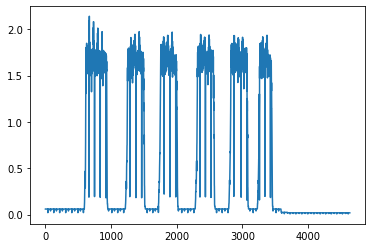

In [4]:
data = pd.read_csv('./sp/sp-data.csv')
x = data.iloc[:,1:-1]
y = data.iloc[:,-1:]

plt.plot(y)

In [38]:
M = 10
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(M,input_shape=(9,),activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(M,activation='relu'))
model.add(tf.keras.layers.Dense(M,activation='relu'))
model.add(tf.keras.layers.Dense(M,activation='relu'))
model.add(tf.keras.layers.Dense(M,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation = 'relu'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
________________________________________________________

In [39]:
LR = 0.01
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = LR),
             loss = 'mse',
             #loss = 'categorical_crossentrophy',
             metrics = ['acc'])

In [40]:
CYCLE = 30
history = model.fit(x, y, epochs = CYCLE)

Train on 4637 samples
Epoch 1/30
4637/4637 [==============================] - 1s 203us/sample - loss: 0.3272 - acc: 0.0000e+00
Epoch 2/30
4637/4637 [==============================] - 0s 60us/sample - loss: 0.2822 - acc: 0.0000e+00
Epoch 3/30
4637/4637 [==============================] - 0s 60us/sample - loss: 0.2749 - acc: 0.0000e+00
Epoch 4/30
4637/4637 [==============================] - 0s 59us/sample - loss: 0.2738 - acc: 0.0000e+00
Epoch 5/30
4637/4637 [==============================] - 0s 59us/sample - loss: 0.2740 - acc: 0.0000e+00
Epoch 6/30
4637/4637 [==============================] - 0s 61us/sample - loss: 0.2728 - acc: 0.0000e+00
Epoch 7/30
4637/4637 [==============================] - 0s 61us/sample - loss: 0.2746 - acc: 0.0000e+00
Epoch 8/30
4637/4637 [==============================] - 0s 61us/sample - loss: 0.2737 - acc: 0.0000e+00
Epoch 9/30
4637/4637 [==============================] - 0s 61us/sample - loss: 0.2716 - acc: 0.0000e+00
Epoch 10/30
4637/4637 [==================

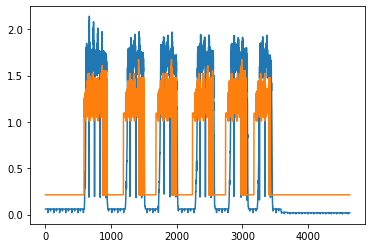

In [41]:
result = model.predict(x)
plt.plot(y)
plt.plot(result)

In [22]:
import time
name_str = '5x%i-%i-%i times' %(M, LR, CYCLE)
r_data = pd.DataFrame(result, columns = [name_str])
runtime = time.strftime('%Y-%m-%d-%H-%M-%S')
#r_data.to_csv('./lds/exp/ldsq-{}-{}.csv'.format(name_str,runtime))


In [29]:
signals = pd.read_csv('./sp/reportSignal-sq-single.csv')
sig1 = signals.iloc[:, 2:11]
sig1


,*te_array0/SQ_CAC_sig00_active,*te_array0/SQ_CAC_sig10_active,*te_array0/SQ_CAC_sig20_active,*te_array0/SQ_CAC_sig30_active,*te_array0/SQ_CAC_sig40_active,*te_array0/SQ_CAC_sig50_active,*te_array0/SQ_CAC_sig60_active,*te_array0/SQ_CAC_sig70_active,*te_array0/SQ_CAC_sig80_active
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4632,0,0,0,0,0,0,0,0,0
4633,0,0,0,0,0,0,0,0,0
4634,0,0,0,0,0,0,0,0,0
4635,0,0,0,0,0,0,0,0,0


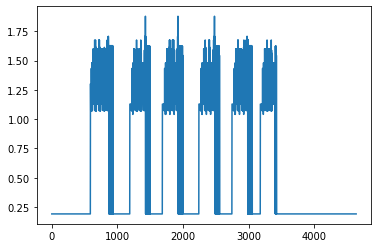

In [30]:
result1 = model.predict(sig1)
data1 = pd.DataFrame(result1)
plt.plot(data1)

In [32]:
data_all = data1
for i in range(1,128):

    sigi = signals.iloc[:, 2+9*i: 11+9*i]
    resulti = model.predict(sigi)
    #np.hstack((result2,resulti))
    datai = pd.DataFrame(resulti)
    data_all = pd.concat([data_all, datai], axis = 1)
    data_all.to_csv('./sp - prediction.csv')